In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize_scalar

import matplotlib as mpl
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

np.random.seed(1000)

## Data & settings: model shift

In [3]:
def get_isotropic_data(n, p, beta, sigma):
    X = np.random.randn(n, p)
    Y = X @ beta + sigma * np.random.randn(n, 1)
    return X, Y

## Estimates

In [4]:
def get_HPS_estimator(X1, Y1, X2, Y2):
    K = np.linalg.inv(X1.T @ X1 + X2.T @ X2)
    return K @ (X1.T @ Y1 + X2.T @ Y2)

def excess_risk_isotropic_cov(beta_hat, beta):
    return np.linalg.norm(beta_hat - beta) ** 2

def get_mse(X, Y, beta):
    err = (X @ beta - Y)**2
    return np.mean(err)

def te_target_emp(X1, X2, beta_t, sigma):

    Y1 = (X1 @ beta_t + np.random.normal(0, sigma, (X1.shape[0], 1))) 

    Y2 = (X2 @ beta_t + np.random.normal(0, sigma, (X2.shape[0], 1))) 

    #print(X1.shape, Y1.shape)

    beta_hps = get_HPS_estimator(X1, Y1, X2, Y2)

    emp_err = np.linalg.norm(beta_hps - beta_t)**2

    return emp_err

def get_bias_plus_variance(X1, X2, n1, n2, p, sigma, d):
    K = np.linalg.inv(X1.T @ X1 + X2.T @ X2)
    beta_s = np.random.normal(0, d / math.sqrt(p), (p, 1))
    beta_t = np.random.normal(0, d / math.sqrt(p), (p, 1))

    x = 0
    trials = 20
    for i in range(trials):
        variance = te_target_emp(X1, X2, beta_t, sigma) #sigma**2 * np.trace(K)
    
        bias = (2.0 * d**2 / p) * (np.linalg.norm(K @ X1.T @ X1, 'fro') **2) #np.linalg.norm(K @ X1.T @ X1 @ (beta_s - beta_t)) **2 #

        x += variance + bias
    return x / trials

def get_ols_variance(X, sigma):
    return sigma**2 * np.trace( np.linalg.inv(X.T @ X) )

def theoretical_estimate(n1, n2, p, sigma, d):
    variance = p * sigma**2 / (n1 + n2 - p)
    bias = 2* d**2 * (n1**2 * (n1 + n2 - p) + p * n1 * n2) / ((n1 + n2)**2 * (n1 + n2 - p))
    return variance + bias

def get_results(n1_list, n2, p, sigma, d):
    emp_list = []
    ols_list = []
    thy_list = []

    X2 = np.random.randn(n2, p)
    for n1 in n1_list:
        X1 = np.random.randn(n1, p)
         
        bias_var = get_bias_plus_variance(X1, X2, n1, n2, p, sigma, d)
        estimate = theoretical_estimate(float(n1), float(n2), float(p), sigma, d)
        emp_list.append(bias_var)

#        ols_list.append(sigma**2 * p / (n2 - p))
        ols_list.append(sigma**2 * np.trace( np.linalg.inv(X2.T @ X2) ))
        
        thy_list.append(estimate)
    
    return emp_list, ols_list, thy_list

## Figure 3a: when d is small, transfer is always positive

## Figure 3b: when d is in the intermediate range, transfer goes down and up

## Fig 3c: when d is large, transfer is always negative

## Fig 1: motivating example

<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v8/8_pync_n0_vf_5wr12y0p8vh0000gn/T/ipykernel_47443/119038734.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathrm{Excess~risk}$', fontsize=24)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


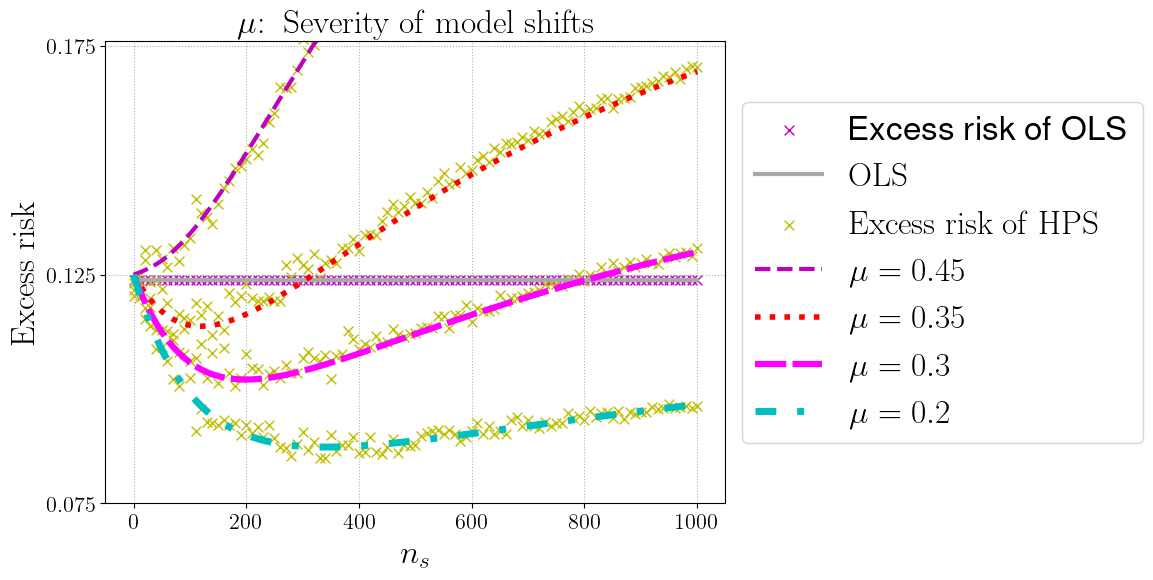

In [ ]:
import matplotlib as mpl
from matplotlib import rc

#mpl.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
#rc('legend', fontsize=12)
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

n2 = 300
p = 100
sigma = 0.5
n1_list = [10 * i for i in range(0, 101)]




d = 0.45
emp_list_5, ols_list, thy_list_5 = get_results(n1_list, n2, p, sigma, d)
#ols_list = [sigma**2 * np.trace() for n1 ]
plt.scatter(n1_list, ols_list, marker='x', c='m',  s=50, lw=1, label=r'Excess risk of OLS')
plt.plot(n1_list, ols_list,  c='darkgrey', lw=3, label=r'$\mathrm{OLS}$')

plt.scatter(n1_list, emp_list_5, marker='x', c='y',  s=50, lw=1, label=r'$\mathrm{Excess~risk~of~HPS}$')
plt.plot(n1_list, thy_list_5, c='m', lw=3, ls='dashed', label=r'$\mu=0.45$')

d = 0.35
emp_list_6, ols_list, thy_list_6 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_6, marker='x', c='y',  s=50, lw=1)
plt.plot(n1_list, thy_list_6, c='r', lw=4, ls='dotted', label=r'$\mu=0.35$')

d = 0.3
emp_list_8, ols_list, thy_list_8 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_8, marker='x', c='y',  s=50, lw=1)
plt.plot(n1_list, thy_list_8, c='magenta', lw=4.5, ls=(0, (5, 1)), label=r'$\mu=0.3$')

d = 0.25
emp_list_7, ols_list, thy_list_7 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_7, marker='x', c='y',  s=50, lw=1.0)
plt.plot(n1_list, thy_list_7, c='c', lw=5, ls=(0, (3, 3, 1, 3)), label=r'$\mu=0.2$')

plt.xlabel(r'$n_s$', fontsize=24)
plt.ylabel('$\mathrm{Excess~risk}$', fontsize=24)
plt.title(r'$\mu\mathrm{:~Severity~of~model~shifts}$', fontsize=24)
#axes = plt.gca()
#axes.set_xlim([1.0, 20.0])

plt.yticks(np.arange(0.075, 0.285, 0.05), fontsize=16)
plt.xticks(fontsize=16)
#plt.xlim([500, 4000])
plt.ylim([0.075, 0.176])

plt.grid(ls = ':', lw=0.8)
lgd = plt.legend(fontsize=24, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.tight_layout()
plt.savefig('motivation.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/v8/8_pync_n0_vf_5wr12y0p8vh0000gn/T/ipykernel_47443/2575213261.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mathrm{Excess~Risk}$', fontsize=32)


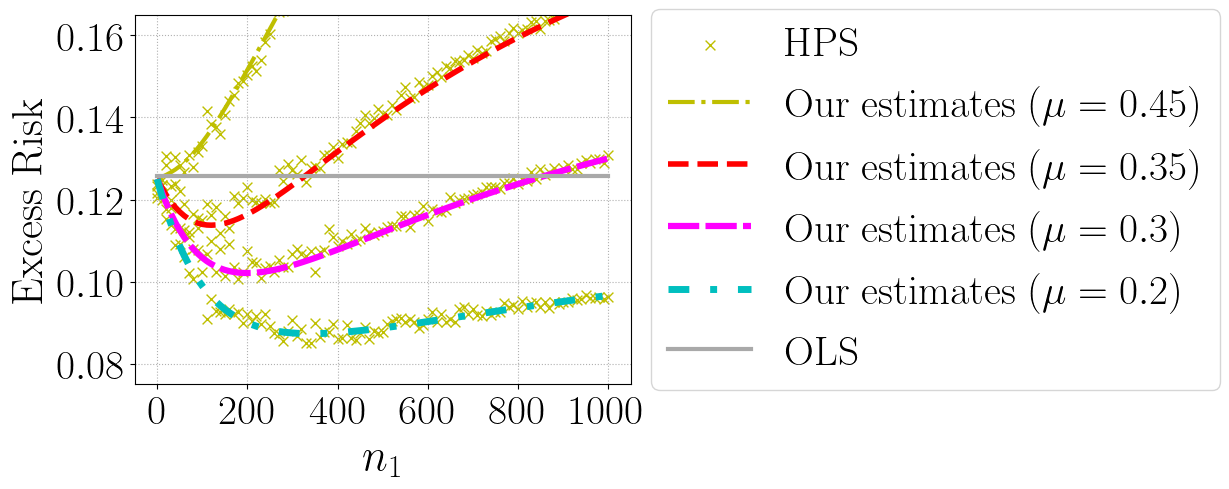

In [19]:
#plt.figure(figsize=(8,6))
#plt.scatter(n1_list, emp_list_5, marker='x', c='y',  s=50, lw=1, label=r'$\mathrm{Excess~risk~of~HPS}$')
plt.scatter(n1_list, emp_list_5, marker='x', c='y',  s=50, lw=1, label=r'$\mathrm{HPS}$')

plt.plot(n1_list, thy_list_5, c='y', lw=3, ls='dashdot', label= r'$\mathrm{Our~estimates}\ $' + r'$(\mu=0.45)$')

plt.scatter(n1_list, emp_list_6, marker='x', c='y',  s=50, lw=1)
plt.plot(n1_list, thy_list_6, c='r', lw=4, ls='dashed', label=r'$\mathrm{Our~estimates}\ $' + r'$(\mu=0.35)$')

plt.scatter(n1_list, emp_list_8, marker='x', c='y',  s=50, lw=1)
plt.plot(n1_list, thy_list_8, c='magenta', lw=4.5, ls=(0, (5, 1)), label=r'$\mathrm{Our~estimates}\ $' + r'$(\mu=0.3)$')

plt.scatter(n1_list, emp_list_7, marker='x', c='y',  s=50, lw=1.0)
plt.plot(n1_list, thy_list_7, c='c', lw=5, ls=(0, (3, 3, 1, 3)), label=r'$\mathrm{Our~estimates}\ $' + r'$(\mu=0.2)$')

plt.plot(n1_list, ols_list,  c='darkgrey', lw=3, label=r'$\mathrm{OLS}$')


plt.xlabel(r'$n_1$', fontsize=32)
plt.ylabel('$\mathrm{Excess~Risk}$', fontsize=32)
#plt.title(r'$\mu\mathrm{:~Severity~of~model~shifts}$', fontsize=24)
axes = plt.gca()
#axes.set_xlim([1.0, 20.0])

plt.yticks(np.arange(0.08, 0.161, 0.02), fontsize=30)
plt.xticks(fontsize=30)
#plt.xlim([500, 4000])
plt.ylim([0.075, 0.165])

plt.grid(ls = ':', lw=0.8)
lgd = plt.legend(fontsize=30, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.tight_layout()
plt.savefig('motivation.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')